In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Coffee_Stores_Data.csv')

In [3]:
df.head()

,StoreID,BusinessDate,PLU,Description,ItemType,CategoryLvl1Desc,CategoryLvl2Desc,CategoryLvl3Desc,ReceivedQuantity,SoldQuantity,EndQuantity,LatestOrder,StockedOut,GroupID,MissedSales
0,2,2019-06-29,3000227,Caprese Sandwich,Unassigned,Food,Cold Case,Ready to Eat,0.0,3.0,0.0,21,0,2.0,0.000000
1,2,2019-06-29,830620,Honey Raisin Bran Muffin,Core,Food,Bake Case,Muffins & Scones,4.0,2.0,0.0,10,0,2.0,0.000000
2,2,2019-06-29,6228,Pressed Juicery Spicy Greens w Ginger,Unassigned,Food,Cold Case,Ready to Drink,0.0,1.0,9.0,13,0,2.0,0.000000
3,2,2019-06-29,12216,Vive Juice Shot,Unassigned,Food,Cold Case,Ready to Drink,0.0,0.0,27.0,0,0,2.0,0.000000
4,2,2019-06-29,3000277,Mixed Berries & Granola Yogurt Parfait,Unassigned,Food,Cold Case,Ready to Eat,0.0,3.0,0.0,11,1,2.0,0.578969


In [4]:
df.columns

Index(['StoreID', 'BusinessDate', 'PLU', 'Description', 'ItemType',
       'CategoryLvl1Desc', 'CategoryLvl2Desc', 'CategoryLvl3Desc',
       'ReceivedQuantity', 'SoldQuantity', 'EndQuantity', 'LatestOrder',
       'StockedOut', 'GroupID', 'MissedSales'],
      dtype='object')

In [5]:
df_18 = df[df['StoreID'] == 18].copy()
df_18['DayOfMonth'] = df_18['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).day)
df_18['DayOfWeek'] = df_18['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).day_of_week)
df_18['Month'] = df_18['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).month)
df_18['Year'] = df_18['BusinessDate'].apply(lambda x:(pd.Timestamp(x)).year)
df_18['PLU'] = df_18['PLU'].astype(str)
df_18.drop(['BusinessDate','StoreID','Description','LatestOrder','CategoryLvl1Desc'],axis=1,inplace=True)

In [6]:
df_18.head()

,PLU,ItemType,CategoryLvl2Desc,CategoryLvl3Desc,ReceivedQuantity,SoldQuantity,EndQuantity,StockedOut,GroupID,MissedSales,DayOfMonth,DayOfWeek,Month,Year
39461,3000227,Unassigned,Cold Case,Ready to Eat,4.0,1.0,4.0,0,3.0,0.00000,29,5,6,2019
39462,830620,Core,Bake Case,Muffins & Scones,2.0,1.0,0.0,1,3.0,2.56395,29,5,6,2019
39463,6228,Unassigned,Cold Case,Ready to Drink,6.0,0.0,8.0,0,3.0,0.00000,29,5,6,2019
39464,12216,Unassigned,Cold Case,Ready to Drink,0.0,0.0,3.0,0,3.0,0.00000,29,5,6,2019
39465,3000277,Unassigned,Cold Case,Ready to Eat,4.0,3.0,4.0,0,3.0,0.00000,29,5,6,2019


In [7]:
df_18.columns

Index(['PLU', 'ItemType', 'CategoryLvl2Desc', 'CategoryLvl3Desc',
       'ReceivedQuantity', 'SoldQuantity', 'EndQuantity', 'StockedOut',
       'GroupID', 'MissedSales', 'DayOfMonth', 'DayOfWeek', 'Month', 'Year'],
      dtype='object')

In [8]:
df_18 = pd.get_dummies(df_18,['PLU','ItemType','CategoryLvl2Desc','CategoryLvl3Desc'])

In [9]:
df_18.columns

Index(['ReceivedQuantity', 'SoldQuantity', 'EndQuantity', 'StockedOut',
       'GroupID', 'MissedSales', 'DayOfMonth', 'DayOfWeek', 'Month', 'Year',
       'PLU_12216', 'PLU_3000024', 'PLU_3000096', 'PLU_3000159', 'PLU_3000162',
       'PLU_3000166', 'PLU_3000181', 'PLU_3000207', 'PLU_3000209',
       'PLU_3000210', 'PLU_3000211', 'PLU_3000212', 'PLU_3000214',
       'PLU_3000227', 'PLU_3000277', 'PLU_3000278', 'PLU_3000281',
       'PLU_3000293', 'PLU_3000296', 'PLU_3000297', 'PLU_6228', 'PLU_810407',
       'PLU_810703', 'PLU_820221', 'PLU_820224', 'PLU_820602', 'PLU_820801',
       'PLU_820902', 'PLU_830620', 'PLU_841402', 'PLU_851004', 'ItemType_Core',
       'ItemType_Seasonal', 'ItemType_Unassigned',
       'CategoryLvl2Desc_Bake Case', 'CategoryLvl2Desc_Cold Case',
       'CategoryLvl3Desc_Bagels', 'CategoryLvl3Desc_Cakes & Breads',
       'CategoryLvl3Desc_Cookies & Bars', 'CategoryLvl3Desc_Muffins & Scones',
       'CategoryLvl3Desc_Pastries', 'CategoryLvl3Desc_Ready to Drink'

In [10]:
df_18 = df_18.astype(float)

In [11]:
df_18[df_18['MissedSales'].isna()] = 0.0

In [12]:
df_18_X = df_18.drop(['SoldQuantity'],axis=1)
df_18_y = df_18['SoldQuantity']

In [13]:
df_18_X.columns

Index(['ReceivedQuantity', 'EndQuantity', 'StockedOut', 'GroupID',
       'MissedSales', 'DayOfMonth', 'DayOfWeek', 'Month', 'Year', 'PLU_12216',
       'PLU_3000024', 'PLU_3000096', 'PLU_3000159', 'PLU_3000162',
       'PLU_3000166', 'PLU_3000181', 'PLU_3000207', 'PLU_3000209',
       'PLU_3000210', 'PLU_3000211', 'PLU_3000212', 'PLU_3000214',
       'PLU_3000227', 'PLU_3000277', 'PLU_3000278', 'PLU_3000281',
       'PLU_3000293', 'PLU_3000296', 'PLU_3000297', 'PLU_6228', 'PLU_810407',
       'PLU_810703', 'PLU_820221', 'PLU_820224', 'PLU_820602', 'PLU_820801',
       'PLU_820902', 'PLU_830620', 'PLU_841402', 'PLU_851004', 'ItemType_Core',
       'ItemType_Seasonal', 'ItemType_Unassigned',
       'CategoryLvl2Desc_Bake Case', 'CategoryLvl2Desc_Cold Case',
       'CategoryLvl3Desc_Bagels', 'CategoryLvl3Desc_Cakes & Breads',
       'CategoryLvl3Desc_Cookies & Bars', 'CategoryLvl3Desc_Muffins & Scones',
       'CategoryLvl3Desc_Pastries', 'CategoryLvl3Desc_Ready to Drink',
       'Catego

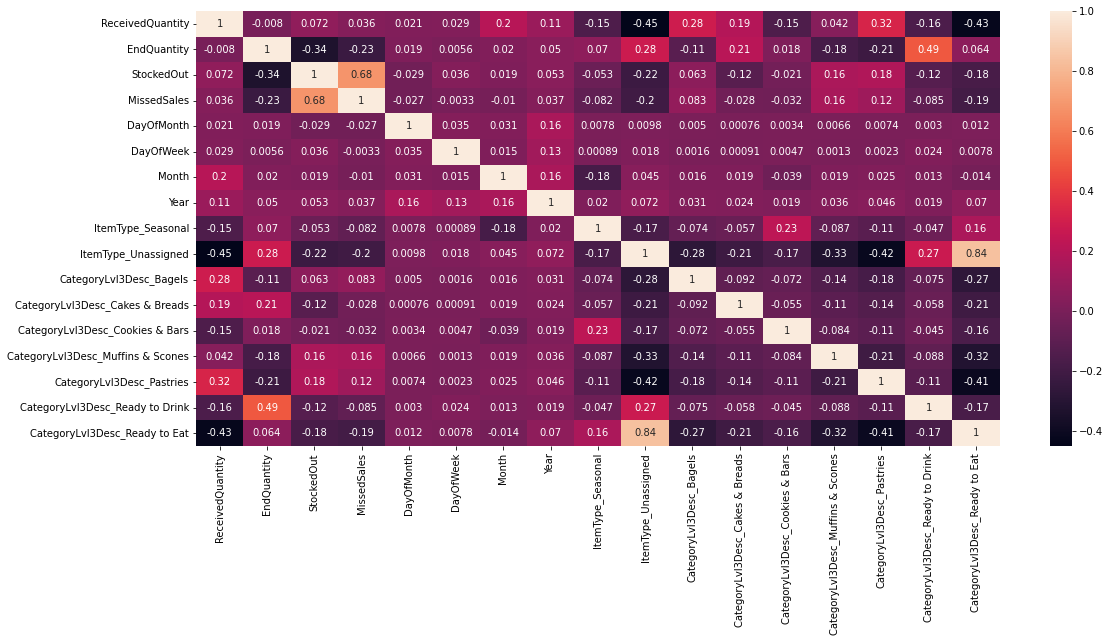

In [14]:
fig, ax = plt.subplots(figsize=(18,8))

df_temp = df_18_X[['ReceivedQuantity', 'EndQuantity', 'StockedOut',
       'MissedSales', 'DayOfMonth', 'DayOfWeek', 'Month', 'Year',
       'ItemType_Seasonal', 'ItemType_Unassigned',
       'CategoryLvl3Desc_Bagels', 'CategoryLvl3Desc_Cakes & Breads',
       'CategoryLvl3Desc_Cookies & Bars', 'CategoryLvl3Desc_Muffins & Scones',
       'CategoryLvl3Desc_Pastries', 'CategoryLvl3Desc_Ready to Drink',
       'CategoryLvl3Desc_Ready to Eat']]
corrMatrix = df_temp.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [15]:
df_18_X = df_18_X.drop(['GroupID','CategoryLvl2Desc_Cold Case','CategoryLvl2Desc_Bake Case','ItemType_Core',],axis=1)

In [16]:
df_18_X.columns

Index(['ReceivedQuantity', 'EndQuantity', 'StockedOut', 'MissedSales',
       'DayOfMonth', 'DayOfWeek', 'Month', 'Year', 'PLU_12216', 'PLU_3000024',
       'PLU_3000096', 'PLU_3000159', 'PLU_3000162', 'PLU_3000166',
       'PLU_3000181', 'PLU_3000207', 'PLU_3000209', 'PLU_3000210',
       'PLU_3000211', 'PLU_3000212', 'PLU_3000214', 'PLU_3000227',
       'PLU_3000277', 'PLU_3000278', 'PLU_3000281', 'PLU_3000293',
       'PLU_3000296', 'PLU_3000297', 'PLU_6228', 'PLU_810407', 'PLU_810703',
       'PLU_820221', 'PLU_820224', 'PLU_820602', 'PLU_820801', 'PLU_820902',
       'PLU_830620', 'PLU_841402', 'PLU_851004', 'ItemType_Seasonal',
       'ItemType_Unassigned', 'CategoryLvl3Desc_Bagels',
       'CategoryLvl3Desc_Cakes & Breads', 'CategoryLvl3Desc_Cookies & Bars',
       'CategoryLvl3Desc_Muffins & Scones', 'CategoryLvl3Desc_Pastries',
       'CategoryLvl3Desc_Ready to Drink', 'CategoryLvl3Desc_Ready to Eat'],
      dtype='object')

In [17]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler = StandardScaler()

df_18_X[['ReceivedQuantity', 'EndQuantity', 'StockedOut', 'MissedSales',
       'DayOfMonth', 'DayOfWeek', 'Month', 'Year', 'PLU_12216', 'PLU_3000024',
       'PLU_3000096', 'PLU_3000159', 'PLU_3000162', 'PLU_3000166',
       'PLU_3000181', 'PLU_3000207', 'PLU_3000209', 'PLU_3000210',
       'PLU_3000211', 'PLU_3000212', 'PLU_3000214', 'PLU_3000227',
       'PLU_3000277', 'PLU_3000278', 'PLU_3000281', 'PLU_3000293',
       'PLU_3000296', 'PLU_3000297', 'PLU_6228', 'PLU_810407', 'PLU_810703',
       'PLU_820221', 'PLU_820224', 'PLU_820602', 'PLU_820801', 'PLU_820902',
       'PLU_830620', 'PLU_841402', 'PLU_851004', 'ItemType_Seasonal',
       'ItemType_Unassigned', 'CategoryLvl3Desc_Bagels',
       'CategoryLvl3Desc_Cakes & Breads', 'CategoryLvl3Desc_Cookies & Bars',
       'CategoryLvl3Desc_Muffins & Scones', 'CategoryLvl3Desc_Pastries',
       'CategoryLvl3Desc_Ready to Drink', 'CategoryLvl3Desc_Ready to Eat']] = scaler.fit_transform(
    df_18_X[['ReceivedQuantity', 'EndQuantity', 'StockedOut', 'MissedSales',
       'DayOfMonth', 'DayOfWeek', 'Month', 'Year', 'PLU_12216', 'PLU_3000024',
       'PLU_3000096', 'PLU_3000159', 'PLU_3000162', 'PLU_3000166',
       'PLU_3000181', 'PLU_3000207', 'PLU_3000209', 'PLU_3000210',
       'PLU_3000211', 'PLU_3000212', 'PLU_3000214', 'PLU_3000227',
       'PLU_3000277', 'PLU_3000278', 'PLU_3000281', 'PLU_3000293',
       'PLU_3000296', 'PLU_3000297', 'PLU_6228', 'PLU_810407', 'PLU_810703',
       'PLU_820221', 'PLU_820224', 'PLU_820602', 'PLU_820801', 'PLU_820902',
       'PLU_830620', 'PLU_841402', 'PLU_851004', 'ItemType_Seasonal',
       'ItemType_Unassigned', 'CategoryLvl3Desc_Bagels',
       'CategoryLvl3Desc_Cakes & Breads', 'CategoryLvl3Desc_Cookies & Bars',
       'CategoryLvl3Desc_Muffins & Scones', 'CategoryLvl3Desc_Pastries',
       'CategoryLvl3Desc_Ready to Drink', 'CategoryLvl3Desc_Ready to Eat']])

In [18]:
df_18_X.head()

,ReceivedQuantity,EndQuantity,StockedOut,MissedSales,DayOfMonth,DayOfWeek,Month,Year,PLU_12216,PLU_3000024,...,PLU_851004,ItemType_Seasonal,ItemType_Unassigned,CategoryLvl3Desc_Bagels,CategoryLvl3Desc_Cakes & Breads,CategoryLvl3Desc_Cookies & Bars,CategoryLvl3Desc_Muffins & Scones,CategoryLvl3Desc_Pastries,CategoryLvl3Desc_Ready to Drink,CategoryLvl3Desc_Ready to Eat
39461,0.122317,0.772101,-0.597780,-0.407668,1.501558,0.991173,-0.103466,0.086728,-0.166783,-0.184115,...,-0.191587,-0.214882,1.245939,-0.345085,-0.265326,-0.208377,-0.405055,-0.519513,-0.217096,1.277969
39462,-0.533243,-0.557045,1.672858,3.161934,1.501558,0.991173,-0.103466,0.086728,-0.166783,-0.184115,...,-0.191587,-0.214882,-0.802607,-0.345085,-0.265326,-0.208377,2.468801,-0.519513,-0.217096,-0.782491
39463,0.777878,2.101248,-0.597780,-0.407668,1.501558,0.991173,-0.103466,0.086728,-0.166783,-0.184115,...,-0.191587,-0.214882,1.245939,-0.345085,-0.265326,-0.208377,-0.405055,-0.519513,4.606264,-0.782491
39464,-1.188803,0.439815,-0.597780,-0.407668,1.501558,0.991173,-0.103466,0.086728,5.995817,-0.184115,...,-0.191587,-0.214882,1.245939,-0.345085,-0.265326,-0.208377,-0.405055,-0.519513,4.606264,-0.782491
39465,0.122317,0.772101,-0.597780,-0.407668,1.501558,0.991173,-0.103466,0.086728,-0.166783,-0.184115,...,-0.191587,-0.214882,1.245939,-0.345085,-0.265326,-0.208377,-0.405055,-0.519513,-0.217096,1.277969


In [19]:
df_18_X.columns

Index(['ReceivedQuantity', 'EndQuantity', 'StockedOut', 'MissedSales',
       'DayOfMonth', 'DayOfWeek', 'Month', 'Year', 'PLU_12216', 'PLU_3000024',
       'PLU_3000096', 'PLU_3000159', 'PLU_3000162', 'PLU_3000166',
       'PLU_3000181', 'PLU_3000207', 'PLU_3000209', 'PLU_3000210',
       'PLU_3000211', 'PLU_3000212', 'PLU_3000214', 'PLU_3000227',
       'PLU_3000277', 'PLU_3000278', 'PLU_3000281', 'PLU_3000293',
       'PLU_3000296', 'PLU_3000297', 'PLU_6228', 'PLU_810407', 'PLU_810703',
       'PLU_820221', 'PLU_820224', 'PLU_820602', 'PLU_820801', 'PLU_820902',
       'PLU_830620', 'PLU_841402', 'PLU_851004', 'ItemType_Seasonal',
       'ItemType_Unassigned', 'CategoryLvl3Desc_Bagels',
       'CategoryLvl3Desc_Cakes & Breads', 'CategoryLvl3Desc_Cookies & Bars',
       'CategoryLvl3Desc_Muffins & Scones', 'CategoryLvl3Desc_Pastries',
       'CategoryLvl3Desc_Ready to Drink', 'CategoryLvl3Desc_Ready to Eat'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_18_X, df_18_y, test_size=0.2, random_state=1)

In [21]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train,y_train)
regression.score(X_test,y_test)

0.6454549465189281

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor,XGBRFRegressor

model_params = {
    
    'linear_regression': {
        'model': LinearRegression(),
        'params': {
            #######
        }  
    },
    'ridge_regression': {
        'model': Ridge(),
        'params': {
             'alpha': [0.01,0.1,0.5,1.0]
         }
    },
    'decision_tree': {
        'model': DecisionTreeRegressor(),
        'params': {
             'max_depth':[2,5,10,15,20]
         }  
    },
    'random_forest': {
        'model': RandomForestRegressor(),
        'params': {
             'max_depth':[2,5,10,15,20,25]
         }
    },
        'gbm_regression' : {
        'model': GradientBoostingRegressor(),
        'params' : {
            'learning_rate': [0.2],
            'n_estimators': [100],
             'max_depth' : [5]
         }
    },
        'lgb' : {
        'model': LGBMRegressor(),
        'params' : {
            'learning_rate':[0.01],
            'n_estimators':[1440],
             'max_depth' : [12]
         }
     },
        'XGB_regression' : {
        'model': XGBRegressor(),
        'params' : {
            'learning_rate': [0.1],
            'n_estimators': [1500],
             'max_depth' : [2]
         }
    },
#         'XGBRF_regression' : {
#         'model': XGBRFRegressor(),
#         'params' : {
#             'learning_rate':[0.5],
#             'n_estimators':[10,50,100,500,1000,1500],
# #             'max_depth' : [1,2,5,7,10]
#          }
#     }
}

C:\Users\029338502\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [23]:
# Model Selection and hyper-parameter tuning 
from sklearn.model_selection import GridSearchCV

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'],mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_temp = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_temp

C:\Users\029338502\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\029338502\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\029338502\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
C:\Users\029338502\AppData\Local\Programs\Python\Pyt

,model,best_score,best_params
0,linear_regression,0.637413,{}
1,ridge_regression,0.637021,{'alpha': 0.01}
2,decision_tree,0.670802,{'max_depth': 5}
3,random_forest,0.716864,{'max_depth': 10}
4,gbm_regression,0.726153,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti..."
5,lgb,0.731403,"{'learning_rate': 0.01, 'max_depth': 12, 'n_es..."
6,XGB_regression,0.728698,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti..."


In [24]:
df_temp['best_params'][0]

{}

In [25]:
import tensorflow as tf

In [26]:
df_18.head()

,ReceivedQuantity,SoldQuantity,EndQuantity,StockedOut,GroupID,MissedSales,DayOfMonth,DayOfWeek,Month,Year,...,ItemType_Unassigned,CategoryLvl2Desc_Bake Case,CategoryLvl2Desc_Cold Case,CategoryLvl3Desc_Bagels,CategoryLvl3Desc_Cakes & Breads,CategoryLvl3Desc_Cookies & Bars,CategoryLvl3Desc_Muffins & Scones,CategoryLvl3Desc_Pastries,CategoryLvl3Desc_Ready to Drink,CategoryLvl3Desc_Ready to Eat
39461,4.0,1.0,4.0,0.0,3.0,0.00000,29.0,5.0,6.0,2019.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
39462,2.0,1.0,0.0,1.0,3.0,2.56395,29.0,5.0,6.0,2019.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
39463,6.0,0.0,8.0,0.0,3.0,0.00000,29.0,5.0,6.0,2019.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39464,0.0,0.0,3.0,0.0,3.0,0.00000,29.0,5.0,6.0,2019.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39465,4.0,3.0,4.0,0.0,3.0,0.00000,29.0,5.0,6.0,2019.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
